## TensorFlow Regression Analysis

### Step 1: Obtain Dataset

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import tensorflow as tf

from funcs import load_stocks_dataframe

In [2]:
df = load_stocks_dataframe()
df = df.dropna()

### Step 2: Construct Function to Run the Model

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

def tfanalysis(target_stock, econ_variable, test_size):
    y = df[target_stock]
    X = df[econ_variable]

    # convert to np array
    X = np.array(X, dtype = np.float32)
    y = np.array(y, dtype = np.float32)
    
    # split train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    
    # normalize the dataset
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # model training 

    # input layer
    input_layer = Input(shape=(X.shape[1],))
    
    dense_layer_1 = Dense(300, activation='relu')(input_layer)
    dense_layer_2 = Dense(300, activation='relu')(dense_layer_1)
    dense_layer_3 = Dense(300, activation='relu')(dense_layer_2)
    
    # output layer
    output = Dense(1)(dense_layer_3)

    model1 = Model(inputs=input_layer, outputs=output)
    model1.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
    
    # train the model
    history = model1.fit(X_train, y_train, batch_size=2, epochs=50, verbose=1, validation_split=0.2)
    
    # plot the mean square loss
    plt.plot(history.history["mean_squared_error"], label = "training")
    plt.plot(history.history["val_mean_squared_error"], label = "validation")
    plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
    plt.legend()
    
    # total mean square loss
    pred = model1.predict(X_test)
    print(np.sqrt(mean_squared_error(y_test,pred)))
    
    return (pred, model1)

### Step 3: Experimentation

#### 5 year Inflation

2022-02-24 00:55:36.000804: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-24 00:55:36.001156: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Train on 2069 samples, validate on 518 samples
Epoch 1/50
2069/2069 [==============================] - 9s 4ms/sample - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 5.1634e-04 - val_mean_squared_error: 5.1634e-04
Epoch 2/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 1.7505e-04 - val_mean_squared_error: 1.7505e-04
Epoch 3/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 8.5648e-04 - mean_squared_error: 8.5648e-04 - val_loss: 3.2338e-04 - val_mean_squared_error: 3.2338e-04
Epoch 4/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 3.6945e-04 - mean_squared_error: 3.6945e-04 - val_loss: 1.2884e-04 - val_mean_squared_error: 1.2884e-04
Epoch 5/50
2069/2069 [==============================] - 22s 11ms/sample - loss: 1.5472e-04 - mean_squared_error: 1.5472e-04 - val_loss: 1.3493e-04 - val_mean_squared_error: 1.3493e-04
Epoch 6/50
2069/2069 [==============================] - 8

2069/2069 [==============================] - 8s 4ms/sample - loss: 1.0370e-04 - mean_squared_error: 1.0370e-04 - val_loss: 1.1162e-04 - val_mean_squared_error: 1.1162e-04
Epoch 46/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.0507e-04 - mean_squared_error: 1.0507e-04 - val_loss: 1.1167e-04 - val_mean_squared_error: 1.1167e-04
Epoch 47/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.0463e-04 - mean_squared_error: 1.0463e-04 - val_loss: 1.1231e-04 - val_mean_squared_error: 1.1231e-04
Epoch 48/50
2069/2069 [==============================] - 10s 5ms/sample - loss: 1.0334e-04 - mean_squared_error: 1.0334e-04 - val_loss: 1.1742e-04 - val_mean_squared_error: 1.1742e-04
Epoch 49/50
2069/2069 [==============================] - 7s 3ms/sample - loss: 1.0410e-04 - mean_squared_error: 1.0410e-04 - val_loss: 1.1697e-04 - val_mean_squared_error: 1.1697e-04
Epoch 50/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.0237e-04 - mean

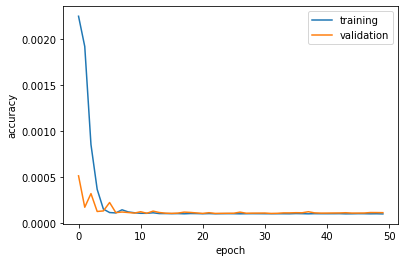

In [4]:
model1 = tfanalysis("GrowthStock_PercentChange", ["inflation5yr_PercentChange"], 0.3)[1]

Train on 2069 samples, validate on 518 samples
Epoch 1/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 1.6790e-04 - val_mean_squared_error: 1.6790e-04
Epoch 2/50
2069/2069 [==============================] - 7s 3ms/sample - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 2.1771e-04 - val_mean_squared_error: 2.1771e-04
Epoch 3/50
2069/2069 [==============================] - 7s 3ms/sample - loss: 4.1662e-04 - mean_squared_error: 4.1662e-04 - val_loss: 1.3050e-04 - val_mean_squared_error: 1.3050e-04
Epoch 4/50
2069/2069 [==============================] - 7s 3ms/sample - loss: 9.9815e-04 - mean_squared_error: 9.9815e-04 - val_loss: 2.5838e-04 - val_mean_squared_error: 2.5838e-04
Epoch 5/50
2069/2069 [==============================] - 7s 3ms/sample - loss: 1.5078e-04 - mean_squared_error: 1.5078e-04 - val_loss: 1.5051e-04 - val_mean_squared_error: 1.5051e-04
Epoch 6/50
2069/2069 [==============================] - 7s 

2069/2069 [==============================] - 8s 4ms/sample - loss: 1.2682e-04 - mean_squared_error: 1.2682e-04 - val_loss: 1.3799e-04 - val_mean_squared_error: 1.3799e-04
Epoch 46/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.2610e-04 - mean_squared_error: 1.2610e-04 - val_loss: 1.2635e-04 - val_mean_squared_error: 1.2635e-04
Epoch 47/50
2069/2069 [==============================] - 9s 4ms/sample - loss: 1.2641e-04 - mean_squared_error: 1.2641e-04 - val_loss: 1.2149e-04 - val_mean_squared_error: 1.2149e-04
Epoch 48/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.2668e-04 - mean_squared_error: 1.2668e-04 - val_loss: 1.1444e-04 - val_mean_squared_error: 1.1444e-04
Epoch 49/50
2069/2069 [==============================] - 12s 6ms/sample - loss: 1.2692e-04 - mean_squared_error: 1.2692e-04 - val_loss: 1.2555e-04 - val_mean_squared_error: 1.2555e-04
Epoch 50/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.2533e-04 - mean

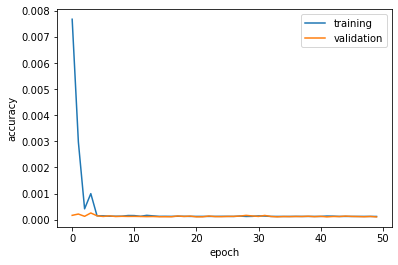

In [5]:
model2 = tfanalysis("ValueStock_PercentChange", ["inflation5yr_PercentChange"], 0.3)[1]

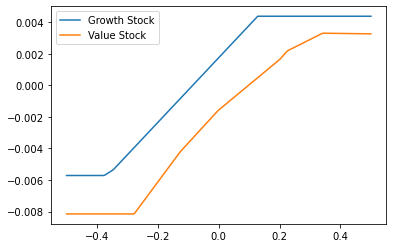

In [6]:
testing_data = np.linspace(-0.5,0.5,200)
growth_change = model1.predict(testing_data)
value_change = model2.predict(testing_data)
plt.plot(testing_data, growth_change, label = "Growth Stock")
plt.plot(testing_data, value_change, label = "Value Stock")
plt.legend()

#### CPI Percentage Change

Train on 2069 samples, validate on 518 samples
Epoch 1/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 1.3366e-04 - val_mean_squared_error: 1.3366e-04
Epoch 2/50
2069/2069 [==============================] - 13s 6ms/sample - loss: 1.1923e-04 - mean_squared_error: 1.1923e-04 - val_loss: 1.2502e-04 - val_mean_squared_error: 1.2502e-04
Epoch 3/50
2069/2069 [==============================] - 9s 4ms/sample - loss: 1.3783e-04 - mean_squared_error: 1.3783e-04 - val_loss: 1.2942e-04 - val_mean_squared_error: 1.2942e-04
Epoch 4/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.2771e-04 - mean_squared_error: 1.2771e-04 - val_loss: 1.2152e-04 - val_mean_squared_error: 1.2152e-04
Epoch 5/50
2069/2069 [==============================] - 18s 9ms/sample - loss: 1.1910e-04 - mean_squared_error: 1.1910e-04 - val_loss: 1.2617e-04 - val_mean_squared_error: 1.2617e-04
Epoch 6/50
2069/2069 [===========================

2069/2069 [==============================] - 8s 4ms/sample - loss: 1.1805e-04 - mean_squared_error: 1.1805e-04 - val_loss: 1.1982e-04 - val_mean_squared_error: 1.1982e-04
Epoch 46/50
2069/2069 [==============================] - 11s 5ms/sample - loss: 1.1601e-04 - mean_squared_error: 1.1601e-04 - val_loss: 1.1887e-04 - val_mean_squared_error: 1.1887e-04
Epoch 47/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.1601e-04 - mean_squared_error: 1.1601e-04 - val_loss: 1.2036e-04 - val_mean_squared_error: 1.2036e-04
Epoch 48/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1650e-04 - mean_squared_error: 1.1650e-04 - val_loss: 1.1915e-04 - val_mean_squared_error: 1.1915e-04
Epoch 49/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.1578e-04 - mean_squared_error: 1.1578e-04 - val_loss: 1.1893e-04 - val_mean_squared_error: 1.1893e-04
Epoch 50/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1560e-04 - mean

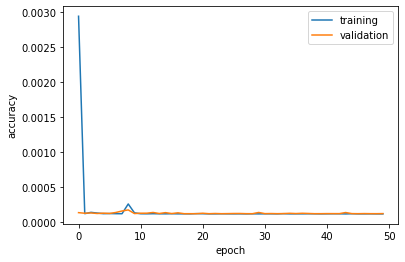

In [7]:
model3 = tfanalysis("GrowthStock_PercentChange", ["CPI_PercentChange"], 0.3)[1]

Train on 2069 samples, validate on 518 samples
Epoch 1/50
2069/2069 [==============================] - 10s 5ms/sample - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 2/50
2069/2069 [==============================] - 20s 10ms/sample - loss: 8.5912e-04 - mean_squared_error: 8.5912e-04 - val_loss: 1.4779e-04 - val_mean_squared_error: 1.4779e-04
Epoch 3/50
2069/2069 [==============================] - 15s 7ms/sample - loss: 1.3104e-04 - mean_squared_error: 1.3104e-04 - val_loss: 1.4687e-04 - val_mean_squared_error: 1.4687e-04
Epoch 4/50
2069/2069 [==============================] - 10s 5ms/sample - loss: 1.3151e-04 - mean_squared_error: 1.3151e-04 - val_loss: 1.4833e-04 - val_mean_squared_error: 1.4833e-04
Epoch 5/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.3393e-04 - mean_squared_error: 1.3393e-04 - val_loss: 1.4386e-04 - val_mean_squared_error: 1.4386e-04
Epoch 6/50
2069/2069 [==============================] 

2069/2069 [==============================] - 7s 3ms/sample - loss: 1.2719e-04 - mean_squared_error: 1.2719e-04 - val_loss: 1.4396e-04 - val_mean_squared_error: 1.4396e-04
Epoch 46/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.2700e-04 - mean_squared_error: 1.2700e-04 - val_loss: 1.4901e-04 - val_mean_squared_error: 1.4901e-04
Epoch 47/50
2069/2069 [==============================] - 7s 3ms/sample - loss: 1.2815e-04 - mean_squared_error: 1.2815e-04 - val_loss: 1.4392e-04 - val_mean_squared_error: 1.4392e-04
Epoch 48/50
2069/2069 [==============================] - 24s 12ms/sample - loss: 1.2768e-04 - mean_squared_error: 1.2768e-04 - val_loss: 1.4476e-04 - val_mean_squared_error: 1.4476e-04
Epoch 49/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.2668e-04 - mean_squared_error: 1.2668e-04 - val_loss: 1.5123e-04 - val_mean_squared_error: 1.5123e-04
Epoch 50/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.2609e-04 - mea

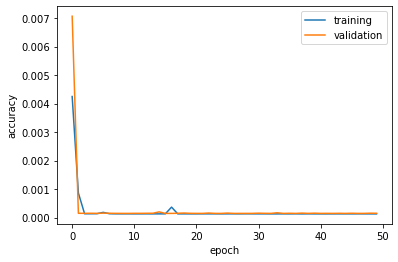

In [8]:
model4 = tfanalysis("ValueStock_PercentChange", ["CPI_PercentChange"], 0.3)[1]

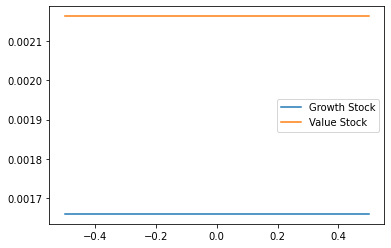

In [9]:
testing_data = np.linspace(-0.5,0.5,200)
growth_change = model3.predict(testing_data)
value_change = model4.predict(testing_data)
plt.plot(testing_data, growth_change, label = "Growth Stock")
plt.plot(testing_data, value_change, label = "Value Stock")
plt.legend()

#### Exchange Percentage Difference

Train on 2069 samples, validate on 518 samples
Epoch 1/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 1.2725e-04 - val_mean_squared_error: 1.2725e-04
Epoch 2/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 5.8145e-04 - mean_squared_error: 5.8145e-04 - val_loss: 1.2338e-04 - val_mean_squared_error: 1.2338e-04
Epoch 3/50
2069/2069 [==============================] - 22s 11ms/sample - loss: 3.0242e-04 - mean_squared_error: 3.0242e-04 - val_loss: 1.1607e-04 - val_mean_squared_error: 1.1607e-04
Epoch 4/50
2069/2069 [==============================] - 10s 5ms/sample - loss: 1.2648e-04 - mean_squared_error: 1.2648e-04 - val_loss: 1.1438e-04 - val_mean_squared_error: 1.1438e-04
Epoch 5/50
2069/2069 [==============================] - 10s 5ms/sample - loss: 1.2582e-04 - mean_squared_error: 1.2582e-04 - val_loss: 1.1269e-04 - val_mean_squared_error: 1.1269e-04
Epoch 6/50
2069/2069 [=========================

2069/2069 [==============================] - 9s 4ms/sample - loss: 1.1607e-04 - mean_squared_error: 1.1607e-04 - val_loss: 1.1636e-04 - val_mean_squared_error: 1.1636e-04
Epoch 46/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1731e-04 - mean_squared_error: 1.1731e-04 - val_loss: 1.1457e-04 - val_mean_squared_error: 1.1457e-04
Epoch 47/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1465e-04 - mean_squared_error: 1.1465e-04 - val_loss: 1.1970e-04 - val_mean_squared_error: 1.1970e-04
Epoch 48/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1592e-04 - mean_squared_error: 1.1592e-04 - val_loss: 1.1334e-04 - val_mean_squared_error: 1.1334e-04
Epoch 49/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.1573e-04 - mean_squared_error: 1.1573e-04 - val_loss: 1.2223e-04 - val_mean_squared_error: 1.2223e-04
Epoch 50/50
2069/2069 [==============================] - 9s 4ms/sample - loss: 1.1490e-04 - mean_

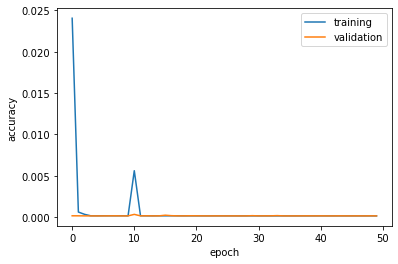

In [10]:
model5 = tfanalysis("GrowthStock_PercentChange", ["exchange_PercentChange"], 0.3)[1]

Train on 2069 samples, validate on 518 samples
Epoch 1/50
2069/2069 [==============================] - 9s 4ms/sample - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 1.3169e-04 - val_mean_squared_error: 1.3169e-04
Epoch 2/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.2537e-04 - mean_squared_error: 1.2537e-04 - val_loss: 1.7389e-04 - val_mean_squared_error: 1.7389e-04
Epoch 3/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.2911e-04 - mean_squared_error: 1.2911e-04 - val_loss: 1.4206e-04 - val_mean_squared_error: 1.4206e-04
Epoch 4/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 1.4411e-04 - val_mean_squared_error: 1.4411e-04
Epoch 5/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.1897e-04 - mean_squared_error: 1.1897e-04 - val_loss: 1.3557e-04 - val_mean_squared_error: 1.3557e-04
Epoch 6/50
2069/2069 [==============================] - 8s 

2069/2069 [==============================] - 8s 4ms/sample - loss: 1.1756e-04 - mean_squared_error: 1.1756e-04 - val_loss: 1.4357e-04 - val_mean_squared_error: 1.4357e-04
Epoch 46/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.1463e-04 - mean_squared_error: 1.1463e-04 - val_loss: 1.6317e-04 - val_mean_squared_error: 1.6317e-04
Epoch 47/50
2069/2069 [==============================] - 9s 4ms/sample - loss: 1.1358e-04 - mean_squared_error: 1.1358e-04 - val_loss: 1.4702e-04 - val_mean_squared_error: 1.4702e-04
Epoch 48/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.1764e-04 - mean_squared_error: 1.1764e-04 - val_loss: 1.4517e-04 - val_mean_squared_error: 1.4517e-04
Epoch 49/50
2069/2069 [==============================] - 9s 4ms/sample - loss: 1.1508e-04 - mean_squared_error: 1.1508e-04 - val_loss: 1.4099e-04 - val_mean_squared_error: 1.4099e-04
Epoch 50/50
2069/2069 [==============================] - 11s 5ms/sample - loss: 1.1475e-04 - mean

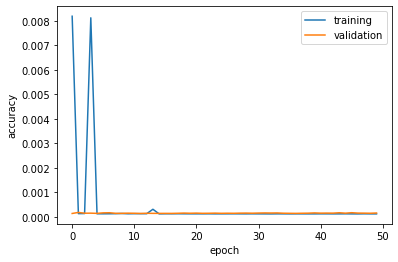

In [11]:
model6 = tfanalysis("ValueStock_PercentChange", ["exchange_PercentChange"], 0.3)[1]

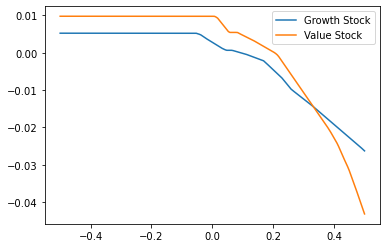

In [12]:
testing_data = np.linspace(-0.5,0.5,200)
growth_change = model5.predict(testing_data)
value_change = model6.predict(testing_data)
plt.plot(testing_data, growth_change, label = "Growth Stock")
plt.plot(testing_data, value_change, label = "Value Stock")
plt.legend()

#### 10 Year Treasury Yield

Train on 2069 samples, validate on 518 samples
Epoch 1/50
2069/2069 [==============================] - 9s 4ms/sample - loss: 3.6411e-04 - mean_squared_error: 3.6411e-04 - val_loss: 1.1828e-04 - val_mean_squared_error: 1.1828e-04
Epoch 2/50
2069/2069 [==============================] - 11s 5ms/sample - loss: 1.4172e-04 - mean_squared_error: 1.4172e-04 - val_loss: 1.0695e-04 - val_mean_squared_error: 1.0695e-04
Epoch 3/50
2069/2069 [==============================] - 9s 4ms/sample - loss: 1.2420e-04 - mean_squared_error: 1.2420e-04 - val_loss: 1.2922e-04 - val_mean_squared_error: 1.2922e-04
Epoch 4/50
2069/2069 [==============================] - 19s 9ms/sample - loss: 1.2774e-04 - mean_squared_error: 1.2774e-04 - val_loss: 9.1912e-05 - val_mean_squared_error: 9.1912e-05
Epoch 5/50
2069/2069 [==============================] - 10s 5ms/sample - loss: 1.2112e-04 - mean_squared_error: 1.2112e-04 - val_loss: 9.4968e-05 - val_mean_squared_error: 9.4968e-05
Epoch 6/50
2069/2069 [==================

2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1513e-04 - mean_squared_error: 1.1513e-04 - val_loss: 1.0511e-04 - val_mean_squared_error: 1.0511e-04
Epoch 46/50
2069/2069 [==============================] - 11s 5ms/sample - loss: 1.1514e-04 - mean_squared_error: 1.1514e-04 - val_loss: 9.5343e-05 - val_mean_squared_error: 9.5343e-05
Epoch 47/50
2069/2069 [==============================] - 10s 5ms/sample - loss: 1.1475e-04 - mean_squared_error: 1.1475e-04 - val_loss: 9.1342e-05 - val_mean_squared_error: 9.1342e-05
Epoch 48/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.1467e-04 - mean_squared_error: 1.1467e-04 - val_loss: 9.4173e-05 - val_mean_squared_error: 9.4173e-05
Epoch 49/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1706e-04 - mean_squared_error: 1.1706e-04 - val_loss: 9.7141e-05 - val_mean_squared_error: 9.7141e-05
Epoch 50/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1645e-04 - mea

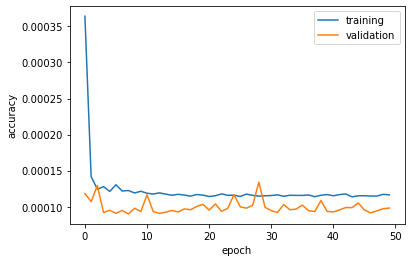

In [13]:
model7 = tfanalysis("GrowthStock_PercentChange", ["Treasury10yr_PercentChange"], 0.3)[1]

Train on 2069 samples, validate on 518 samples
Epoch 1/50
2069/2069 [==============================] - 10s 5ms/sample - loss: 3.0408e-04 - mean_squared_error: 3.0408e-04 - val_loss: 1.2051e-04 - val_mean_squared_error: 1.2051e-04
Epoch 2/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.2444e-04 - mean_squared_error: 1.2444e-04 - val_loss: 1.2344e-04 - val_mean_squared_error: 1.2344e-04
Epoch 3/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.2438e-04 - mean_squared_error: 1.2438e-04 - val_loss: 1.1365e-04 - val_mean_squared_error: 1.1365e-04
Epoch 4/50
2069/2069 [==============================] - 10s 5ms/sample - loss: 1.2038e-04 - mean_squared_error: 1.2038e-04 - val_loss: 1.1705e-04 - val_mean_squared_error: 1.1705e-04
Epoch 5/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.2762e-04 - mean_squared_error: 1.2762e-04 - val_loss: 1.2907e-04 - val_mean_squared_error: 1.2907e-04
Epoch 6/50
2069/2069 [===================

2069/2069 [==============================] - 8s 4ms/sample - loss: 1.0922e-04 - mean_squared_error: 1.0922e-04 - val_loss: 1.1355e-04 - val_mean_squared_error: 1.1355e-04
Epoch 46/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1064e-04 - mean_squared_error: 1.1064e-04 - val_loss: 1.1591e-04 - val_mean_squared_error: 1.1591e-04
Epoch 47/50
2069/2069 [==============================] - 7s 3ms/sample - loss: 1.1086e-04 - mean_squared_error: 1.1086e-04 - val_loss: 1.1060e-04 - val_mean_squared_error: 1.1060e-04
Epoch 48/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1039e-04 - mean_squared_error: 1.1039e-04 - val_loss: 1.3209e-04 - val_mean_squared_error: 1.3209e-04
Epoch 49/50
2069/2069 [==============================] - 8s 4ms/sample - loss: 1.1032e-04 - mean_squared_error: 1.1032e-04 - val_loss: 1.3112e-04 - val_mean_squared_error: 1.3112e-04
Epoch 50/50
2069/2069 [==============================] - 7s 4ms/sample - loss: 1.1248e-04 - mean_

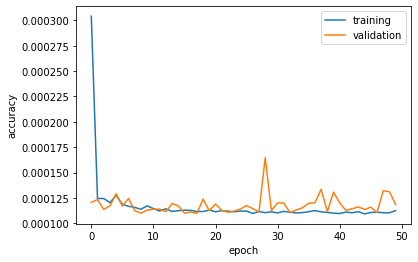

In [14]:
model8 = tfanalysis("ValueStock_PercentChange", ["Treasury10yr_PercentChange"], 0.3)[1]

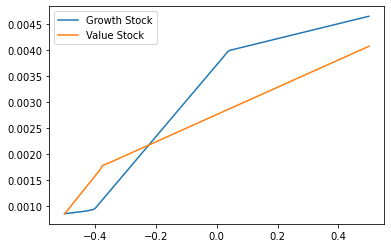

In [15]:
testing_data = np.linspace(-0.5,0.5,200)
growth_change = model7.predict(testing_data)
value_change = model8.predict(testing_data)
plt.plot(testing_data, growth_change, label = "Growth Stock")
plt.plot(testing_data, value_change, label = "Value Stock")
plt.legend()

## Step 4: Visualization

In [16]:
testing_data = np.linspace(-0.5, 0.5, 1000)

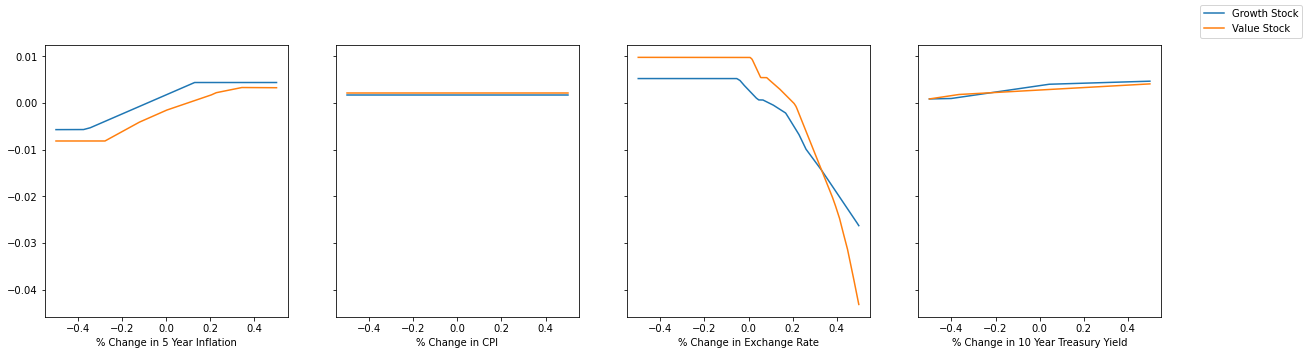

In [17]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5), sharey = True)
ax[0].plot(testing_data, model1.predict(testing_data), label = "Growth Stock")
ax[0].plot(testing_data, model2.predict(testing_data), label = "Value Stock")
ax[0].set_xlabel('% Change in 5 Year Inflation')
ax[1].plot(testing_data, model3.predict(testing_data))
ax[1].plot(testing_data, model4.predict(testing_data))
ax[1].set_xlabel('% Change in CPI')
ax[2].plot(testing_data, model5.predict(testing_data))
ax[2].plot(testing_data, model6.predict(testing_data))
ax[2].set_xlabel('% Change in Exchange Rate')
ax[3].plot(testing_data, model7.predict(testing_data))
ax[3].plot(testing_data, model8.predict(testing_data))
ax[3].set_xlabel('% Change in 10 Year Treasury Yield')
fig.legend()